# Time series and regressions

In [20]:
options(repr.plot.width=4, repr.plot.height=4)

In [14]:
x <- seq(1:60)
set.seed = 1111
eps <- 3 * rnorm(60,0,1)
y <- 1.5 + 2 * x + eps
#y <- rep(0,60)

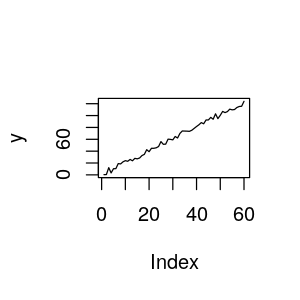

In [9]:
plot(y, type = 'l')

In [16]:
mod1 <- lm(y~x)
#plot(mod1)

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"plot.type" is not a graphical parameter”

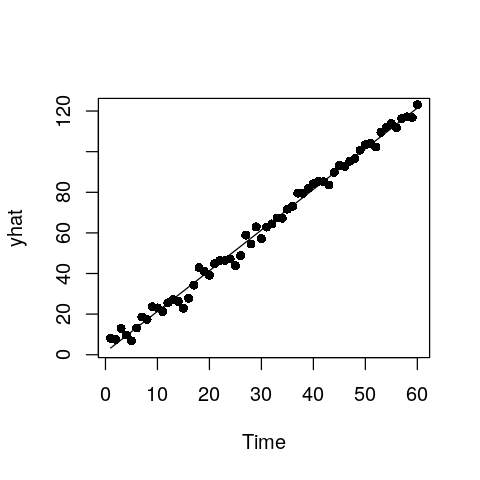

In [78]:
yhat <- mod1$fitted
plot.ts(yhat,plot.type='single', type = 'l')
points(y,plot.type='single',type='p',pch = 16, lw = 0.2)

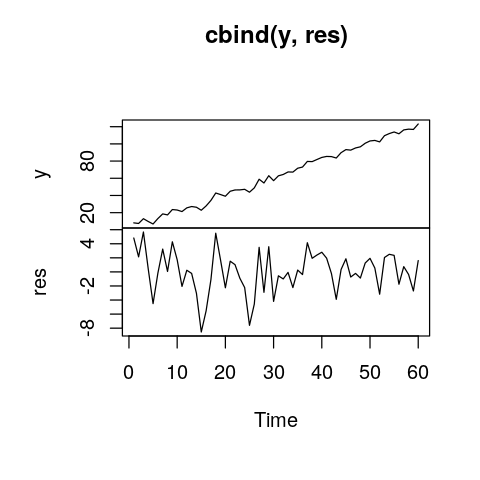

In [24]:
res <- mod1$resid
plot.ts(cbind(y,res), plot.type='multi')

In [25]:
coeff <- mod1$coefficients

In [26]:
print(coeff)

(Intercept)           x 
   1,311915    2,003194 


In [28]:
help(lm)
str(mod1)

List of 12
 $ coefficients : Named num [1:2] 1,31 2,00
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "x"
 $ residuals    : Named num [1:60] 4,82 2,14 5,67 0,41 -4,51 ...
  ..- attr(*, "names")= chr [1:60] "1" "2" "3" "4" ...
 $ effects      : Named num [1:60] -483,421 268,719 4,879 -0,371 -5,280 ...
  ..- attr(*, "names")= chr [1:60] "(Intercept)" "x" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:60] 3,32 5,32 7,32 9,32 11,33 ...
  ..- attr(*, "names")= chr [1:60] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:60, 1:2] -7,746 0,129 0,129 0,129 0,129 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:60] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "x"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1,13 1,19
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 58
 $ xlevels      : Named list()
 $ call 

In [29]:
a <- coeff/sqrt(diag(vcov(mod1)))

In [31]:
summary(mod1)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-8,5422 -1,8299  0,1481  1,9379  5,6699 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1,31191    0,78132   1,679   0,0985 .  
x            2,00319    0,02228  89,924   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 2,988 on 58 degrees of freedom
Multiple R-squared:  0,9929,	Adjusted R-squared:  0,9928 
F-statistic:  8086 on 1 and 58 DF,  p-value: < 2,2e-16


### Analysing Beer.txt

In [79]:
y <- scan('Data/Beer.txt')

In [84]:
str(y)
head(y)
summary(y)

 num [1:32] 36,1 44,6 44,1 35,7 36,2 ...


[1] 36,14 44,60 44,15 35,72 36,19 44,63

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  35,72   41,43   44,60   45,13   49,23   55,18 

In [86]:
help(ts)

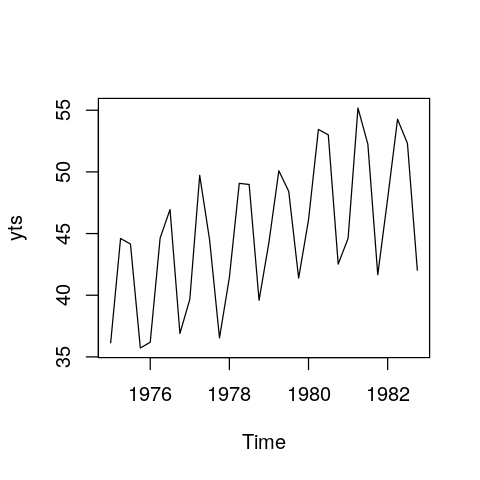

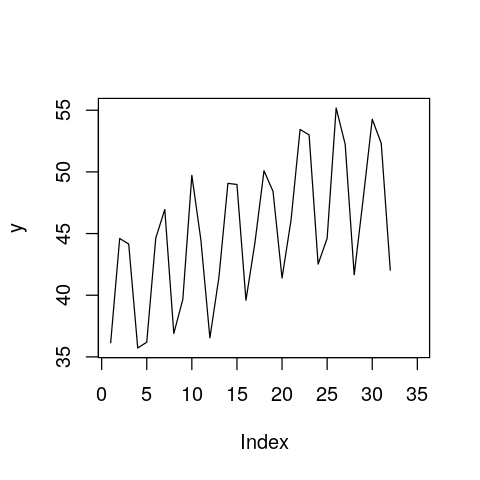

In [92]:
yts <- ts(y, start = c(1975,1),frequency = 4)
plot(yts)
plot(y,type= 'l',xlim = c(1,35))

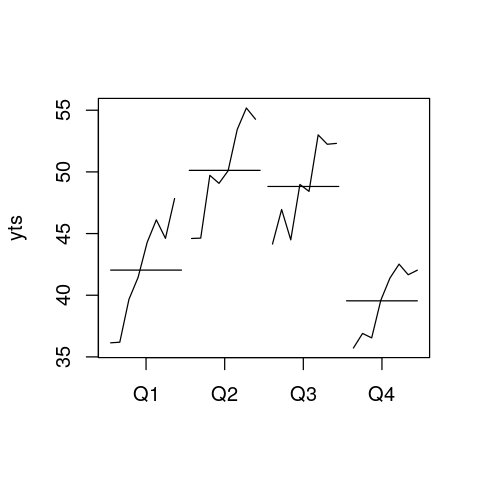

In [88]:
monthplot(yts)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = y ~ tt)

Residuals:
    Min      1Q  Median      3Q     Max 
-8,2993 -4,9565  0,3374  4,3787  6,8632 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39,59595    1,77291  22,334   <2e-16 ***
tt           0,33542    0,09377   3,577   0,0012 ** 
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 4,897 on 30 degrees of freedom
Multiple R-squared:  0,299,	Adjusted R-squared:  0,2756 
F-statistic:  12,8 on 1 and 30 DF,  p-value: 0,001203


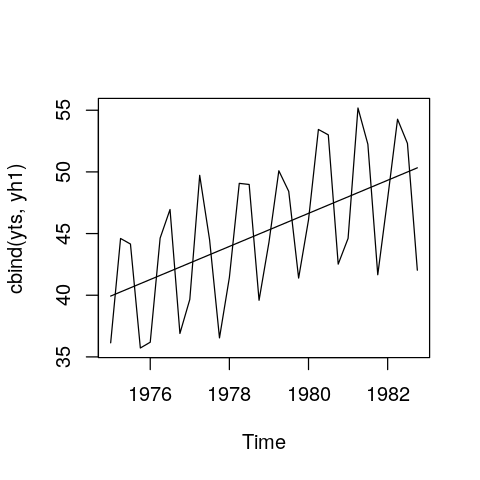

In [100]:
tt<-c(1:length(y))
# fitting a simple line
reg_mod1<-lm(y~tt)
summary(reg_mod1)
yh1<- reg_mod1$fit   # yh1<- fitted(reg_mod1) does the same
#plot(y,type="l")
#lines(yh1)
plot.ts(cbind(yts,yh1),plot.type="single",type="l") # trial OK

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = y ~ tt + S1 + S2 + S3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2,46240 -0,94970 -0,00015  1,12850  2,06165 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39,29798    0,52407  74,986  < 2e-16 ***
tt           0,35347    0,02777  12,731 6,34e-13 ***
S1          -2,56510    0,44273  -5,794 3,65e-06 ***
S2           5,17142    0,44099  11,727 4,19e-12 ***
S3           3,51045    0,44099   7,960 1,48e-08 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 1,44 on 27 degrees of freedom
Multiple R-squared:  0,9455,	Adjusted R-squared:  0,9374 
F-statistic: 117,1 on 4 and 27 DF,  p-value: < 2,2e-16


,(Intercept),tt,S1,S2,S3
(Intercept),"0,274647092","-0,0127204969","-0,019080745","-0,0063602484","0,0063602484"
tt,"-0,012720497","0,0007709392","0,001156409","0,0003854696","-0,0003854696"
S1,"-0,019080745","0,0011564088","0,196011293","-0,0641806889","-0,0653370977"
S2,"-0,006360248","0,0003854696","-0,064180689","0,1944694146","-0,0649516281"
S3,"0,006360248","-0,0003854696","-0,065337098","-0,0649516281","0,1944694146"


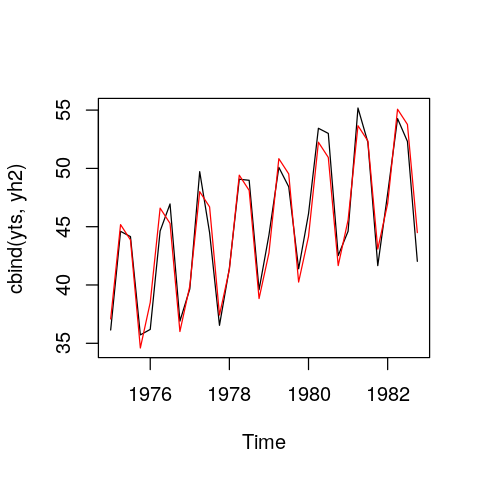

In [101]:
S1<- rep(c(1,0,0,-1),8)
S2<- rep(c(0,1,0,-1),8)
S3<- rep(c(0,0,1,-1),8)
reg_mod2<- lm(y~tt+S1+S2+S3)
summary(reg_mod2)
yh2<- reg_mod2$fit
plot.ts(cbind(yts,yh2),plot.type="single",type="l",col=c(1,2))
vcov(reg_mod2)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = y ~ tt)

Residuals:
    Min      1Q  Median      3Q     Max 
-8,2993 -4,9565  0,3374  4,3787  6,8632 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39,59595    1,77291  22,334   <2e-16 ***
tt           0,33542    0,09377   3,577   0,0012 ** 
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 4,897 on 30 degrees of freedom
Multiple R-squared:  0,299,	Adjusted R-squared:  0,2756 
F-statistic:  12,8 on 1 and 30 DF,  p-value: 0,001203


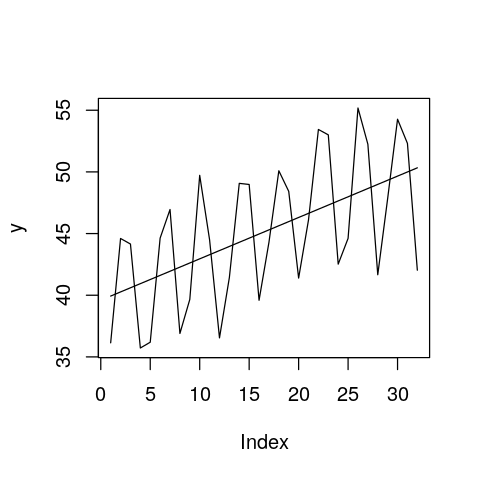

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = y ~ tt + S1 + S2 + S3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2,46240 -0,94970 -0,00015  1,12850  2,06165 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39,29798    0,52407  74,986  < 2e-16 ***
tt           0,35347    0,02777  12,731 6,34e-13 ***
S1          -2,56510    0,44273  -5,794 3,65e-06 ***
S2           5,17142    0,44099  11,727 4,19e-12 ***
S3           3,51045    0,44099   7,960 1,48e-08 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 1,44 on 27 degrees of freedom
Multiple R-squared:  0,9455,	Adjusted R-squared:  0,9374 
F-statistic: 117,1 on 4 and 27 DF,  p-value: < 2,2e-16


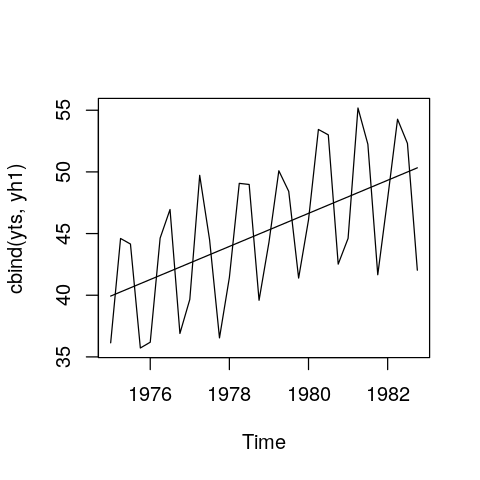

,(Intercept),tt,S1,S2,S3
(Intercept),"0,274647092","-0,0127204969","-0,019080745","-0,0063602484","0,0063602484"
tt,"-0,012720497","0,0007709392","0,001156409","0,0003854696","-0,0003854696"
S1,"-0,019080745","0,0011564088","0,196011293","-0,0641806889","-0,0653370977"
S2,"-0,006360248","0,0003854696","-0,064180689","0,1944694146","-0,0649516281"
S3,"0,006360248","-0,0003854696","-0,065337098","-0,0649516281","0,1944694146"


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
30,"719,55457",NA,NA,NA,NA
27,"55,95168",3,"663,6029","106,7426","4,347032e-15"


[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36

ERROR: Error in eval(predvars, data, env): numeric 'envir' arg not of length one


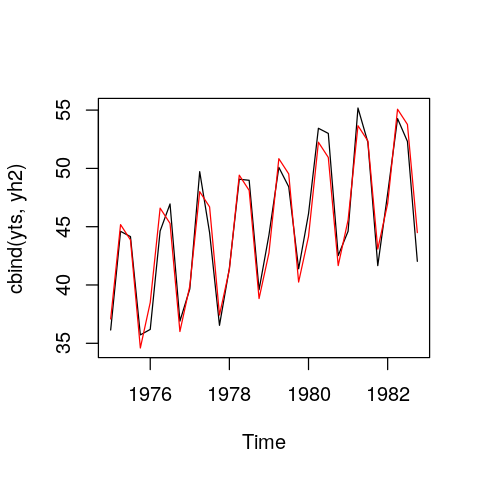

In [96]:
anova(reg_mod1,reg_mod2)
new<- c(33:36)
ttn<-c(tt,new)
ttn
ypred9<- predict(lm(y~tt+S1+S2+S3),ttn)
ypred9
ts.plot(yts,ypred9$pred,xlim=c(1975,1983))
lines(ypred9)



tt<- c(tt,33:36)
S1<- c(S1,c(1,0,0,-1))
S2<- c(S2,c(0,1,0,-1))
S3<- c(S3,c(0,0,1,-1))
tt
length(S1)
length(S2)
length(S3)
length(tt)

new<- data.frame(tt,S1,S2,S3)
setnew<- rbind.data.frame(set,new)
aa<- predict(reg_mod2,new,se.fit=TRUE)
aa
pred.w.plim <- predict(reg_mod2, new, interval = "prediction")
pred.w.clim <- predict(reg_mod2, new, interval = "confidence")
plot(y,xlab="speed",ylab="stopping distance",main=
       "Confidence and Prediction Intervals",type="l",xlim=c(1,40))
matplot(new$tt, cbind(pred.w.clim), lty =
          c(1,2,2,1),type="l",ylab="stopping distance",add=TRUE,xlim=c(1,40))
matplot(new$tt[33:36], cbind(pred.w.plim[33:36]), lty =2,type="l",
        ylab="stopping distance",add=TRUE,xlim=c(1,45),col=c(2,3,4))

tt_add<-c(1:36)
c1<- aa$fit
y_add<- c(y,c1)
y_add
plot(y_add,type="l")
names(new)



SS1<-rep(c(1,0,0,0),8)
SS2<-rep(c(0,1,0,0),8)
SS3<-rep(c(0,0,1,0),8)
reg_mod3<- lm(y~tt+SS1+SS2+SS3)
summary(reg_mod3)
yh3<- fitted(reg_mod3)
plot(y,type="l")
lines(yh3,type="l",col="red")
yh3<- fitted(reg_mod3)
lines(yh2,type="l",col="green")


anova(reg_mod1,reg_mod3)

In [98]:
help(anova)